In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
#loading data

delhivery_data = pd.read_csv('delhivery_data.csv')

In [3]:
delhivery_data.T

,0,1,2,3,4,5,6,7,8,9,...,144857,144858,144859,144860,144861,144862,144863,144864,144865,144866
data,training,training,training,training,training,training,training,training,training,training,...,training,training,training,training,training,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,...,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,...,thanos::sroute:d8f74492-4484-412a-887a-61c8e6b...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...
route_type,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,...,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,...,trip-153718412883843340,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,...,IND600056AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),...,MAA_Poonamallee_HB (Tamil Nadu),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,...,IND600032AAB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),...,Chennai_Hub (Tami

In [4]:
#Shape of the data

delhivery_data.shape

(144867, 24)

In [5]:
#data information on dtype and non-null count

delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

- There are null values in source_name and destination_name
- Let us fill source_name null with any common source_center with respective source_name.
- If we couldn't find let us put the source_name as source_center since they are unique with the respective place.

In [6]:
# storing center as key and names as respective values in dictionary
 
dic={}
for i in range(delhivery_data.shape[0]):
    if delhivery_data['source_center'][i] in dic:
        continue
    else:
        if (delhivery_data['source_name'][i]) is not np.nan:
            dic[delhivery_data['source_center'][i]]=delhivery_data['source_name'][i]
for i in range(delhivery_data.shape[0]):
    if delhivery_data['destination_center'][i] in dic:
        continue
    else:
        if (delhivery_data['destination_name'][i]) is not np.nan:
            dic[delhivery_data['destination_center'][i]]=delhivery_data['destination_name'][i]

# Filling the null values with respective key in dictionary
for i in range(delhivery_data.shape[0]):
    if delhivery_data['source_name'][i] is np.nan:
        if delhivery_data['source_center'][i] in dic:
            delhivery_data['source_name'][i]=dic[delhivery_data['source_center'][i]]

for i in range(delhivery_data.shape[0]):
    if delhivery_data['destination_name'][i] is np.nan:
        if delhivery_data['destination_center'][i] in dic:
            delhivery_data['destination_name'][i]=dic[delhivery_data['destination_center'][i]]

In [7]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

- There is no change in null values so let us keep name as center itself.

In [8]:
for i in range(delhivery_data.shape[0]):
    if delhivery_data['source_name'].loc[i] is np.nan:
        delhivery_data['source_name'].loc[i]=delhivery_data['source_center'].loc[i]
        
for i in range(delhivery_data.shape[0]):
    if delhivery_data['destination_name'].loc[i] is np.nan:
        delhivery_data['destination_name'].loc[i]=delhivery_data['destination_center'].loc[i]


C:\Users\vemul\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
#creating new features city and state from source_name and destination_name

delhivery_data['source_city']=delhivery_data['source_name'].str.split('_').str[0]
delhivery_data['source_state']=delhivery_data['source_name'].str.split('(').str[-1].str[:-1]
delhivery_data['destination_city']=delhivery_data['destination_name'].str.split('_').str[0]
delhivery_data['destination_state']=delhivery_data['destination_name'].str.split('(').str[-1].str[:-1]

In [10]:
delhivery_data.T

,0,1,2,3,4,5,6,7,8,9,...,144857,144858,144859,144860,144861,144862,144863,144864,144865,144866
data,training,training,training,training,training,training,training,training,training,training,...,training,training,training,training,training,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,...,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,...,thanos::sroute:d8f74492-4484-412a-887a-61c8e6b...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...
route_type,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,...,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,...,trip-153718412883843340,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182,trip-153746066843555182
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,...,IND600056AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB,IND131028AAB
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),...,MAA_Poonamallee_HB (Tamil Nadu),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,...,IND600032AAB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),...,Chennai_Hub (Tami

In [11]:
dic={
    'trip_creation_time':'first',
    'route_type':'first',

    'od_start_time':'first',
    'od_end_time':'first',
    'start_scan_to_end_scan':'first',

    'actual_distance_to_destination':'last',
    'actual_time':'last',
    'osrm_time':'last',

    'osrm_distance':'last',
    'segment_osrm_distance':'sum',

    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',

    'source_city':'first',
    'source_state':'first',
    'destination_city':'first',
    'destination_state':'first'
}

In [12]:
cutoff_trip = delhivery_data.groupby(['trip_uuid','source_center','source_name','destination_center','destination_name'],sort=False).agg(dic).reset_index()

In [13]:
cutoff_trip.T

,0,1,2,3,4,5,6,7,8,9,...,26358,26359,26360,26361,26362,26363,26364,26365,26366,26367
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153768492602129387,trip-153693976643699843,trip-153687145942424248,trip-153687145942424248,trip-153825970514894360,trip-153825970514894360,trip-153825970514894360,trip-153721957397763022,...,trip-153797075209653066,trip-153797075209653066,trip-153797075209653066,trip-153799142965708367,trip-153799142965708367,trip-153799142965708367,trip-153695073416451616,trip-153761584139918815,trip-153718412883843340,trip-153746066843555182
source_center,IND388121AAA,IND388620AAB,IND421302AAG,IND400011AAA,IND562132AAA,IND560099AAB,IND141003AAB,IND142026AAA,IND141109AAA,IND562132AAA,...,IND413002AAA,IND413501AAA,IND413401AAA,IND454001AAA,IND457001AAA,IND457226AAA,IND400102AAB,IND421302AAG,IND600056AAB,IND131028AAB
source_name,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),LowerParel_CP (Maharashtra),Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),Ludhiana_GillChwk_DC (Punjab),Jagraon_DC (Punjab),Raikot_DC (Punjab),Bangalore_Nelmngla_H (Karnataka),...,Solapur_Central_I_2 (Maharashtra),Osmanabad_Kakdepot_D (Maharashtra),Barshi_Kurduwdi_D (Maharashtra),Dhar_Trimurti_D (Madhya Pradesh),Ratlam_Khjurwli_DC (Madhya Pradesh),Jaora_RtlamNka_D (Madhya Pradesh),Mumbai_Jogeshwri_L (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),MAA_Poonamallee_HB (Tamil Nadu),Sonipat_Kundli_H (Haryana)
destination_center,IND388620AAB,IND388320AAA,IND411033AAA,IND400072AAD,IND560099AAB,IND683511AAA,IND142026AAA,IND141109AAA,IND000000ACA,IND560083AAB,...,IND413501AAA,IND413401AAA,IND411033AAA,IND457001AAA,IND457226AAA,IND382430AAB,IND421302AAG,IND411033AAA,IND600032AAB,IND000000ACB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),Pune_Tathawde_H (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),Bengaluru_Bomsndra_HB (Karnataka),Aluva_Peedika_H (Kerala),Jagraon_DC (Punjab),Raikot_DC (Punjab),Ludhiana_MilrGanj_HB (Punjab),Bengaluru_Bnnrghta_L (Karnataka),...,Osmanabad_Kakdepot_D (Maharashtra),Barshi_Kurduwdi_D (Maharashtra),Pune_Tathawde_H (Maharashtra),Ratlam_Khjurwli_DC (Madhya Pradesh),Jaora_RtlamNka_D (Madhya Pradesh),Ahmedabad_East_H_1 (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),Chennai_Hub (Tamil Nadu),Gurgaon_Bilaspur_HB (Haryana)
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-13 20:44:19.424489,2018-09-29 22:21:45.149226,2018-09-29 22:21:45.149226,2018-09-29 22:21:45.149226,2018-09-17 21:26:00.454695,...,2018-09-26 14:05:52.096792,2018-09-26 14:05:52.096792,2018-09-26 14:05:52.096792,2018-09-26 19:50:29.657378,2018-09-26 19:50:29.657378,2018-09-26 19:50:29.657378,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
route_type,Carting,Carting,FTL,Carting,FTL,FTL,FTL,FTL,FTL,Carting,...,FTL,FTL,FTL,FTL,FTL,FTL,Carting,FTL,Carting,Carting
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-13 23:59:56.061158,2018-09-30 02:22:04.138164,2018-09-30 03:42:55.193293,2018-09-30 05:12:34.503322,2018-09-17 21:26:00.454695,...,2018-09-26 23:21:29.305862,2018-09-27 01:02:51.710593,2018-09-27 02:21:39.762995,2018-09-27 02:48:14.315366,2018-09-27 05:06:25.175476,2018-09-27 06:55:50.265761,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
od_end_time,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,2018-09-23 11:44:28.365845,2018-09-14 17:31:45.368791,2018-09-13 23:59:56.061158,2018-09-14 13:55:58.765334,2018-09-30 03:42:55.193293,2018-09-30 05:12:34.503322,2018-09-30 06:44:42.320422,2018-09-18 02:47:54.218733,...,2018-09-27 01:02:51.710593,2018-09-27 02:21:39.762995,2018-09-27 08:35:07.61831

In [14]:
dic={
    'source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',

    'trip_creation_time':'first',
    'route_type':'first',

    'od_start_time':'first',
    'od_end_time':'last',
    'start_scan_to_end_scan':'sum',

    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',

    'osrm_distance':'sum',
    'segment_osrm_distance':'sum',

    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',

    'source_city':'first',
    'source_state':'first',
    'destination_city':'last',
    'destination_state':'last' 
}

In [15]:
total_trip = cutoff_trip.groupby(['trip_uuid'],sort=False).agg(dic).reset_index()

In [16]:
total_trip.T

,0,1,2,3,4,5,6,7,8,9,...,14807,14808,14809,14810,14811,14812,14813,14814,14815,14816
trip_uuid,trip-153741093647649320,trip-153768492602129387,trip-153693976643699843,trip-153687145942424248,trip-153825970514894360,trip-153721957397763022,trip-153671602871109556,trip-153840964571880594,trip-153805777481903807,trip-153685690199208775,...,trip-153687166594261221,trip-153842378011134255,trip-153766626912891098,trip-153841785704702048,trip-153797075209653066,trip-153799142965708367,trip-153695073416451616,trip-153761584139918815,trip-153718412883843340,trip-153746066843555182
source_center,IND388121AAA,IND421302AAG,IND400011AAA,IND562132AAA,IND141003AAB,IND562132AAA,IND362001AAA,IND131028AAB,IND600056AAB,IND000000ACA,...,IND638401AAA,IND560027AAA,IND712311AAA,IND000000ACB,IND411033AAA,IND454001AAA,IND400102AAB,IND421302AAG,IND600056AAB,IND131028AAB
source_name,Anand_VUNagar_DC (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),LowerParel_CP (Maharashtra),Bangalore_Nelmngla_H (Karnataka),Ludhiana_GillChwk_DC (Punjab),Bangalore_Nelmngla_H (Karnataka),Junagadh_DPC (Gujarat),Sonipat_Kundli_H (Haryana),MAA_Poonamallee_HB (Tamil Nadu),Ludhiana_MilrGanj_HB (Punjab),...,Sathyamangalam_Mlydpthr_D (Tamil Nadu),Blr_Domlur (Karnataka),Kolkata_Dankuni_HB (West Bengal),Gurgaon_Bilaspur_HB (Haryana),Pune_Tathawde_H (Maharashtra),Dhar_Trimurti_D (Madhya Pradesh),Mumbai_Jogeshwri_L (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),MAA_Poonamallee_HB (Tamil Nadu),Sonipat_Kundli_H (Haryana)
destination_center,IND388320AAA,IND411033AAA,IND400072AAD,IND683511AAA,IND000000ACA,IND560083AAB,IND362001AAA,IND249201AAA,IND600032AAB,IND143001AAA,...,IND641062AAD,IND560099AAA,IND781018AAB,IND562132AAA,IND411033AAA,IND382430AAB,IND421302AAG,IND411033AAA,IND600032AAB,IND000000ACB
destination_name,Anand_Vaghasi_IP (Gujarat),Pune_Tathawde_H (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),Aluva_Peedika_H (Kerala),Ludhiana_MilrGanj_HB (Punjab),Bengaluru_Bnnrghta_L (Karnataka),Junagadh_DPC (Gujarat),Rishikesh_DC (Uttarakhand),Chennai_Hub (Tamil Nadu),Amritsar_DPC (Punjab),...,Coimbatore_Karayam_H (Tamil Nadu),Bengaluru_Bomsndra_PC (Karnataka),Guwahati_Hub (Assam),Bangalore_Nelmngla_H (Karnataka),Pune_Tathawde_H (Maharashtra),Ahmedabad_East_H_1 (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),Chennai_Hub (Tamil Nadu),Gurgaon_Bilaspur_HB (Haryana)
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-29 22:21:45.149226,2018-09-17 21:26:00.454695,2018-09-12 01:33:48.711350,2018-10-01 16:00:45.719099,2018-09-27 14:16:14.819357,2018-09-13 16:41:41.992300,...,2018-09-13 20:47:45.942988,2018-10-01 19:56:20.111591,2018-09-23 01:31:09.129173,2018-10-01 18:17:37.047270,2018-09-26 14:05:52.096792,2018-09-26 19:50:29.657378,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
route_type,Carting,FTL,Carting,FTL,FTL,Carting,Carting,FTL,Carting,FTL,...,Carting,Carting,FTL,FTL,FTL,FTL,Carting,FTL,Carting,Carting
od_start_time,2018-09-20 03:21:32.418600,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-30 02:22:04.138164,2018-09-17 21:26:00.454695,2018-09-12 01:33:48.711350,2018-10-01 16:00:45.719099,2018-09-27 14:16:14.819357,2018-09-13 16:41:41.992300,...,2018-09-14 03:20:43.911048,2018-10-01 19:56:20.111591,2018-09-23 01:31:09.129173,2018-10-02 09:02:19.284969,2018-09-26 14:05:52.096792,2018-09-27 02:48:14.315366,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
od_end_time,2018-09-20 06:36:55.627764,2018-09-23 11:44:28.365845,2018-09-14 17:31:45.368791,2018-09-14 13:55:58.765334,2018-09-30 06:44:42.320422,2018-09-18 02:47:54.218733,2018-09-12 11:26:24.365997,2018-10-02 03:03:51.852141,2018-09-27 17:16:11.083553,2018-09-13 20:40:01.943322,...,2018-09-14 07:05:26.228141,2018-10-01 21:54:42.501733,2018-09-24 18:00:46.913095,2018-10-04 10:

In [17]:
total_trip['trip_creation_time']=pd.to_datetime(total_trip['trip_creation_time'])
total_trip['od_start_time']=pd.to_datetime(total_trip['od_start_time'])
total_trip['od_end_time']=pd.to_datetime(total_trip['od_end_time'])

In [18]:
total_trip['start_to_end_time'] = ((total_trip['od_end_time'] - total_trip['od_start_time']).dt.days)*1440 +((total_trip['od_end_time'] - total_trip['od_start_time']).dt.seconds/60).round()
total_trip['trip_created_month'] = total_trip['trip_creation_time'].dt.month_name()
total_trip['trip_created_day'] = total_trip['trip_creation_time'].dt.day_name()
total_trip['factor_actualtime_to_osrmtime']= (total_trip['actual_time']/total_trip['osrm_time'])

In [19]:
total_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   source_name                     14817 non-null  object        
 3   destination_center              14817 non-null  object        
 4   destination_name                14817 non-null  object        
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   route_type                      14817 non-null  object        
 7   od_start_time                   14817 non-null  datetime64[ns]
 8   od_end_time                     14817 non-null  datetime64[ns]
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [20]:
total_trip.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_osrm_distance,segment_actual_time,segment_osrm_time,start_to_end_time,factor_actualtime_to_osrmtime
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.810016,164.477838,357.143754,161.384018,204.344689,223.201161,353.892286,180.949787,547.455085,2.664211
std,658.705957,305.388147,561.396157,271.360995,370.395573,416.628374,556.247965,314.542047,668.658416,2.363017
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.072900,9.000000,6.000000,23.000000,0.485714
25%,149.000000,22.837239,67.000000,29.000000,30.819200,32.654500,66.000000,31.000000,151.000000,1.750000
50%,280.000000,48.474072,149.000000,60.000000,65.618800,70.154400,147.000000,65.000000,289.000000,2.101227
75%,637.000000,164.583208,370.000000,168.000000,208.475000,218.802400,367.000000,185.000000,673.000000,2.765625
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,3523.632400,6230.000000,2564.000000,7899.000000,77.387097


In [21]:
total_trip.T

,0,1,2,3,4,5,6,7,8,9,...,14807,14808,14809,14810,14811,14812,14813,14814,14815,14816
trip_uuid,trip-153741093647649320,trip-153768492602129387,trip-153693976643699843,trip-153687145942424248,trip-153825970514894360,trip-153721957397763022,trip-153671602871109556,trip-153840964571880594,trip-153805777481903807,trip-153685690199208775,...,trip-153687166594261221,trip-153842378011134255,trip-153766626912891098,trip-153841785704702048,trip-153797075209653066,trip-153799142965708367,trip-153695073416451616,trip-153761584139918815,trip-153718412883843340,trip-153746066843555182
source_center,IND388121AAA,IND421302AAG,IND400011AAA,IND562132AAA,IND141003AAB,IND562132AAA,IND362001AAA,IND131028AAB,IND600056AAB,IND000000ACA,...,IND638401AAA,IND560027AAA,IND712311AAA,IND000000ACB,IND411033AAA,IND454001AAA,IND400102AAB,IND421302AAG,IND600056AAB,IND131028AAB
source_name,Anand_VUNagar_DC (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),LowerParel_CP (Maharashtra),Bangalore_Nelmngla_H (Karnataka),Ludhiana_GillChwk_DC (Punjab),Bangalore_Nelmngla_H (Karnataka),Junagadh_DPC (Gujarat),Sonipat_Kundli_H (Haryana),MAA_Poonamallee_HB (Tamil Nadu),Ludhiana_MilrGanj_HB (Punjab),...,Sathyamangalam_Mlydpthr_D (Tamil Nadu),Blr_Domlur (Karnataka),Kolkata_Dankuni_HB (West Bengal),Gurgaon_Bilaspur_HB (Haryana),Pune_Tathawde_H (Maharashtra),Dhar_Trimurti_D (Madhya Pradesh),Mumbai_Jogeshwri_L (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),MAA_Poonamallee_HB (Tamil Nadu),Sonipat_Kundli_H (Haryana)
destination_center,IND388320AAA,IND411033AAA,IND400072AAD,IND683511AAA,IND000000ACA,IND560083AAB,IND362001AAA,IND249201AAA,IND600032AAB,IND143001AAA,...,IND641062AAD,IND560099AAA,IND781018AAB,IND562132AAA,IND411033AAA,IND382430AAB,IND421302AAG,IND411033AAA,IND600032AAB,IND000000ACB
destination_name,Anand_Vaghasi_IP (Gujarat),Pune_Tathawde_H (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),Aluva_Peedika_H (Kerala),Ludhiana_MilrGanj_HB (Punjab),Bengaluru_Bnnrghta_L (Karnataka),Junagadh_DPC (Gujarat),Rishikesh_DC (Uttarakhand),Chennai_Hub (Tamil Nadu),Amritsar_DPC (Punjab),...,Coimbatore_Karayam_H (Tamil Nadu),Bengaluru_Bomsndra_PC (Karnataka),Guwahati_Hub (Assam),Bangalore_Nelmngla_H (Karnataka),Pune_Tathawde_H (Maharashtra),Ahmedabad_East_H_1 (Gujarat),Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),Chennai_Hub (Tamil Nadu),Gurgaon_Bilaspur_HB (Haryana)
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-29 22:21:45.149226,2018-09-17 21:26:00.454695,2018-09-12 01:33:48.711350,2018-10-01 16:00:45.719099,2018-09-27 14:16:14.819357,2018-09-13 16:41:41.992300,...,2018-09-13 20:47:45.942988,2018-10-01 19:56:20.111591,2018-09-23 01:31:09.129173,2018-10-01 18:17:37.047270,2018-09-26 14:05:52.096792,2018-09-26 19:50:29.657378,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
route_type,Carting,FTL,Carting,FTL,FTL,Carting,Carting,FTL,Carting,FTL,...,Carting,Carting,FTL,FTL,FTL,FTL,Carting,FTL,Carting,Carting
od_start_time,2018-09-20 03:21:32.418600,2018-09-23 06:42:06.021680,2018-09-14 15:42:46.437249,2018-09-13 20:44:19.424489,2018-09-30 02:22:04.138164,2018-09-17 21:26:00.454695,2018-09-12 01:33:48.711350,2018-10-01 16:00:45.719099,2018-09-27 14:16:14.819357,2018-09-13 16:41:41.992300,...,2018-09-14 03:20:43.911048,2018-10-01 19:56:20.111591,2018-09-23 01:31:09.129173,2018-10-02 09:02:19.284969,2018-09-26 14:05:52.096792,2018-09-27 02:48:14.315366,2018-09-14 18:45:34.164734,2018-09-22 11:30:41.399439,2018-09-17 11:35:28.838714,2018-09-20 16:24:28.436231
od_end_time,2018-09-20 06:36:55.627764,2018-09-23 11:44:28.365845,2018-09-14 17:31:45.368791,2018-09-14 13:55:58.765334,2018-09-30 06:44:42.320422,2018-09-18 02:47:54.218733,2018-09-12 11:26:24.365997,2018-10-02 03:03:51.852141,2018-09-27 17:16:11.083553,2018-09-13 20:40:01.943322,...,2018-09-14 07:05:26.228141,2018-10-01 21:54:42.501733,2018-09-24 18:00:46.913095,2018-10-04 10:

### Hypothesis Testing

##### 1.T-TEST_To check the difference between start_to_end_time and start_scan_to_end_scan

<AxesSubplot:xlabel='start_to_end_time', ylabel='start_scan_to_end_scan'>

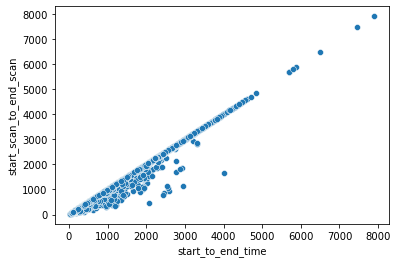

In [22]:
sns.scatterplot(data=total_trip, x='start_to_end_time',y='start_scan_to_end_scan')

**Hypothesis formulation**
- H0 : Means are equal for start_to_end_time and start_scan_to_end_scan
- Ha : Means are not equal for start_to_end_time and start_scan_to_end_scan
- Significance level = 0.05

**Check test assumptions**
- Both variables are having finite mean [CLT]
- All observations are independent
- Standard deviation of population not unknown

In [23]:
#Ratio of variance of data should be around 1 [both are almost equal]
np.var(total_trip['start_to_end_time'])/np.var(total_trip['start_scan_to_end_scan'])

1.0304464999266894

In [24]:
stats.ttest_ind(a=total_trip['start_to_end_time'],b=total_trip['start_scan_to_end_scan'])

Ttest_indResult(statistic=2.158630932891136, pvalue=0.03088681419234098)

- Test statistic = 2.158630932891136
- pvalue = 0.03088681419234098

**Conclusion based on the p-value**
- we reject null hypothesis since the pvalue < significance level.
- so the actual time taken to travel and the time shown by scanner is significantly different.
- So there is some fault in scanning department we should rectify. 

##### 2.T-TEST_To check the difference between  actual_time aggregated value and OSRM time aggregated value

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

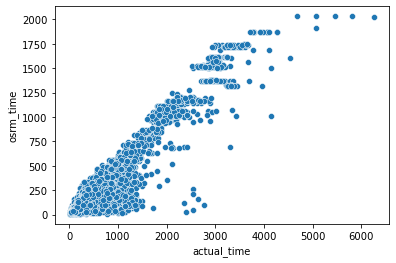

In [25]:
sns.scatterplot(data=total_trip, x='actual_time',y='osrm_time')

**Hypothesis formulation**
- H0 : Means are equal for actual_time aggregated value and OSRM time aggregated value
- Ha : Means are not equal for actual_time aggregated value and OSRM time aggregated value
- Significance level = 0.05

**Check test assumptions**
- Both variables are having finite mean [CLT]
- All observations are independent
- Standard deviation of population not unknown

In [26]:
#Ratio of variance of data should be around 1 [both are almost equal]
np.var(total_trip['actual_time'])/np.var(total_trip['osrm_time'])

4.280002529966534

In [27]:
stats.ttest_ind(a=total_trip['actual_time'],b=total_trip['osrm_time'])

Ttest_indResult(statistic=38.21545390583316, pvalue=0.0)

- statistic=38.21545390583316
- pvalue=0.0

**Conclusion based on the p-value**
- we reject null hypothesis since the pvalue < significance level.
- so the actual time taken to travel and osrm time is significantly different.
- So there is some fault in osrm time we should rectify. 

##### 3.T-TEST_To check the difference between actual_time aggregated value and segment actual time aggregated value 

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

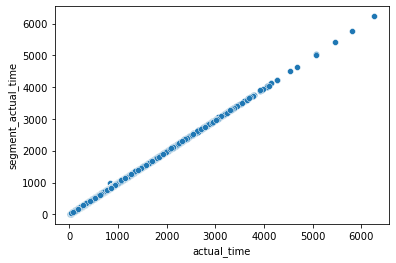

In [28]:
sns.scatterplot(data=total_trip, x='actual_time',y='segment_actual_time')

**Hypothesis formulation**
- H0 : Means are equal for actual_time aggregated value and segment actual time aggregated value 
- Ha : Means are not equal for actual_time aggregated value and segment actual time aggregated value 
- Significance level = 0.05

**Check test assumptions**
- Both variables are having finite mean [CLT]
- All observations are independent
- Standard deviation of population not unknown

In [29]:
#Ratio of variance of data should be around 1 [both are almost equal]
np.var(total_trip['actual_time'])/np.var(total_trip['segment_actual_time'])

1.0185960793807682

In [30]:
stats.ttest_ind(a=total_trip['actual_time'],b=total_trip['segment_actual_time'])

Ttest_indResult(statistic=0.5008024728897531, pvalue=0.6165138648224772)

- statistic=0.5008024728897531 
- pvalue=0.6165138648224772

**Conclusion based on the p-value**
- we accept null hypothesis since the pvalue > significance level.
- so the actual time taken to travel and segment actual time is significantly same. 

##### 4.T-TEST_To check the difference between osrm distance aggregated value and segment osrm distance aggregated value 

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

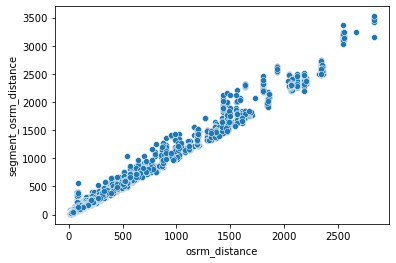

In [31]:
sns.scatterplot(data=total_trip, x='osrm_distance',y='segment_osrm_distance')

**Hypothesis formulation**
- H0 : Means are equal for osrm distance aggregated value and segment osrm distance aggregated value 
- Ha : Means are not equal for osrm distance aggregated value and segment osrm distance aggregated value 
- Significance level = 0.05

**Check test assumptions**
- Both variables are having finite mean [CLT]
- All observations are independent
- Standard deviation of population not unknown

In [32]:
#Ratio of variance of data should be around 1 [both are almost equal]
np.var(total_trip['osrm_distance'])/np.var(total_trip['segment_osrm_distance'])

0.7903762597006766

In [33]:
stats.ttest_ind(a=total_trip['osrm_distance'],b=total_trip['segment_osrm_distance'])

Ttest_indResult(statistic=-4.117367046483823, pvalue=3.842631473353718e-05)

- statistic=-4.117367046483823
- pvalue=3.842631473353718e-05

**Conclusion based on the p-value**
- we reject null hypothesis since the pvalue < significance level.
- so the osrm distance aggregated value and segment osrm distance aggregated value is significantly different.
- osrm distance is less than segment_osrm distance so we are following the shortest path available. 

##### 5.T-TEST_To check the difference between osrm time aggregated value and segment osrm time aggregated value

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

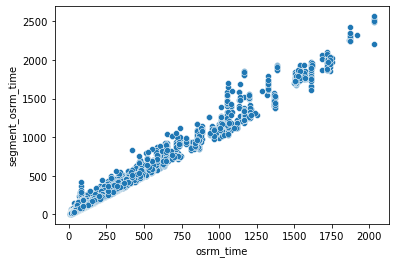

In [34]:
sns.scatterplot(data=total_trip, x='osrm_time',y='segment_osrm_time')

**Hypothesis formulation**
- H0 : Means are equal for osrm time aggregated value and segment osrm time aggregated value
- Ha : Means are not equal for osrm time aggregated value and segment osrm time aggregated value 
- Significance level = 0.05

**Check test assumptions**
- Both variables are having finite mean [CLT]
- All observations are independent
- Standard deviation of population not unknown

In [35]:
#Ratio of variance of data should be around 1 [both are almost equal]
np.var(total_trip['osrm_time'])/np.var(total_trip['segment_osrm_time'])

0.7442818496708701

In [36]:
stats.ttest_ind(a=total_trip['osrm_time'],b=total_trip['segment_osrm_time'])

Ttest_indResult(statistic=-5.733106696963521, pvalue=9.956426798219171e-09)

- statistic=-5.733106696963521
- pvalue=9.956426798219171e-09

**Conclusion based on the p-value**
- we reject null hypothesis since the pvalue < significance level.
- so the osrm time aggregated value and segment osrm time aggregated value is significantly different.
- osrm time is less than segment_osrm time so we are following the fastest possible way. 

##### **Business Insights**

In [37]:
dic={
    'trip_uuid':'nunique',
    'start_to_end_time':'mean',
    'actual_distance_to_destination':'mean'
}

total_trip.groupby(['source_city','destination_city'],sort=False).agg(dic).reset_index().sort_values('trip_uuid',ascending=False)[:20]

,source_city,destination_city,trip_uuid,start_to_end_time,actual_distance_to_destination
18,Bengaluru,Bengaluru,549,165.041894,32.252836
5,Bangalore,Bengaluru,455,218.039560,27.056047
12,Hyderabad,Hyderabad,398,412.090452,85.867238
51,Bhiwandi,Mumbai,332,234.222892,23.004948
56,Bengaluru,Bangalore,326,208.745399,27.675542
17,Mumbai,Mumbai,264,156.128788,16.221021
84,Chandigarh,Chandigarh,248,711.056452,171.376856
14,Gurgaon,Delhi,240,246.845833,48.673475
39,Mumbai Hub (Maharashtra),Mumbai,227,117.396476,16.341615
46,Mumbai,Bhiwandi,207,211.135266,21.589225


- There are more intracity delhivery in Bangalore, Hyderabad, Mumbai, Chandigarh, Delhi.
- Carting will be more useful for intracity delhivery as there will be more warehouses to stop in the city.

In [38]:
dic={
    'trip_uuid':'nunique',
    'start_to_end_time':'mean',
    'actual_distance_to_destination':'mean'
}

grp=total_trip.groupby(['source_city','destination_city'],sort=False).agg(dic).reset_index().sort_values('trip_uuid',ascending=False)
grp[grp['source_city']!=grp['destination_city']][:20]

,source_city,destination_city,trip_uuid,start_to_end_time,actual_distance_to_destination
5,Bangalore,Bengaluru,455,218.039560,27.056047
51,Bhiwandi,Mumbai,332,234.222892,23.004948
56,Bengaluru,Bangalore,326,208.745399,27.675542
14,Gurgaon,Delhi,240,246.845833,48.673475
39,Mumbai Hub (Maharashtra),Mumbai,227,117.396476,16.341615
46,Mumbai,Bhiwandi,207,211.135266,21.589225
91,Delhi,Gurgaon,185,299.875676,44.822834
8,MAA,Chennai,178,187.887640,30.909047
281,Chennai,MAA,115,140.643478,29.277068
24,Bhiwandi,Mumbai Hub (Maharashtra),105,168.895238,21.362172


- These are most busiest intercity transport delhivery.

In [39]:
dic={
    'trip_uuid':'nunique',
    'start_to_end_time':'mean',
    'actual_distance_to_destination':'mean'
}

total_trip.groupby(['source_state','destination_state'],sort=False).agg(dic).reset_index().sort_values('trip_uuid',ascending=False)[:20]

,source_state,destination_state,trip_uuid,start_to_end_time,actual_distance_to_destination
1,Maharashtra,Maharashtra,2406,296.885702,60.110614
4,Karnataka,Karnataka,2014,278.107249,55.177080
6,Tamil Nadu,Tamil Nadu,1016,282.979331,70.125746
7,Haryana,Haryana,871,456.549943,122.749575
9,Telangana,Telangana,655,448.891603,96.038032
0,Gujarat,Gujarat,624,290.887821,78.209488
24,West Bengal,West Bengal,610,455.798361,79.321327
13,Uttar Pradesh,Uttar Pradesh,541,598.070240,99.002271
3,Punjab,Punjab,491,554.466395,141.793453
8,Rajasthan,Rajasthan,422,562.964455,147.524067


- There are more intrastate delhivery in Maharastra, Karnataka, Tamilnadu.

In [40]:
dic={
    'trip_uuid':'nunique',
    'start_to_end_time':'mean',
    'actual_distance_to_destination':'mean'
}

grp=total_trip.groupby(['source_state','destination_state'],sort=False).agg(dic).reset_index().sort_values('trip_uuid',ascending=False)
grp[grp['source_state']!=grp['destination_state']][:20]

,source_state,destination_state,trip_uuid,start_to_end_time,actual_distance_to_destination
27,Delhi,Haryana,396,252.351010,44.560055
11,Haryana,Delhi,311,240.700965,45.686758
59,Haryana,Uttar Pradesh,93,529.763441,143.393839
48,Delhi,Uttar Pradesh,84,648.404762,236.478727
45,Haryana,Punjab,82,594.243902,177.346690
37,Uttar Pradesh,Delhi,72,385.569444,94.293296
47,Uttar Pradesh,Haryana,71,665.225352,217.259243
50,Haryana,Rajasthan,70,498.442857,174.093662
16,Maharashtra,Telangana,52,1274.153846,552.483187
89,Karnataka,Telangana,51,939.941176,388.858840


- More  Interstate delhivery between Delhi, Utterpradesh, Haryana as they are around the capital city delhi and part of delhi comes under these states.
- There are long distance delhivery interstates for that we can keep FTL more to make fast.

In [41]:
total_trip.groupby(['source_name','destination_name'],sort=False).agg(dic).reset_index().sort_values('trip_uuid',ascending=False)[:20]

,source_name,destination_name,trip_uuid,start_to_end_time,actual_distance_to_destination
110,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),175,911.965714,229.050532
59,Bangalore_Nelmngla_H (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),151,183.556291,28.022125
70,Muzaffrpur_Bbganj_I (Bihar),Muzaffrpur_Bbganj_I (Bihar),130,1040.661538,183.674728
158,Bengaluru_Bomsndra_HB (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),121,198.719008,41.727380
269,Bhiwandi_Mankoli_HB (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),113,600.362832,88.039656
178,Bengaluru_KGAirprt_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),108,191.527778,28.084732
29,Ahmedabad_East_H_1 (Gujarat),Ahmedabad_East_H_1 (Gujarat),107,284.439252,38.521501
28,Bhiwandi_Mankoli_HB (Maharashtra),Mumbai Hub (Maharashtra),105,168.895238,21.362172
163,Mumbai_Chndivli_PC (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),99,201.686869,20.117543
33,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),97,288.195876,39.522005


- These are the most busiest delhivery between centers.

##### **Recommendations**

- Scanners showing time differently than actual time, this should be rectify.
- For long distance busiest delhivery between centers go for FTL.
- osrm time is so different from actual time taken so that should be tuned well from the data.
- For Interstate delhivery try to do between two main warehouse in those states, so that the segment delhivery will be fast.
- Take actions on drivers who delivered late without any valuable reason.

**Outliers**

<AxesSubplot:>

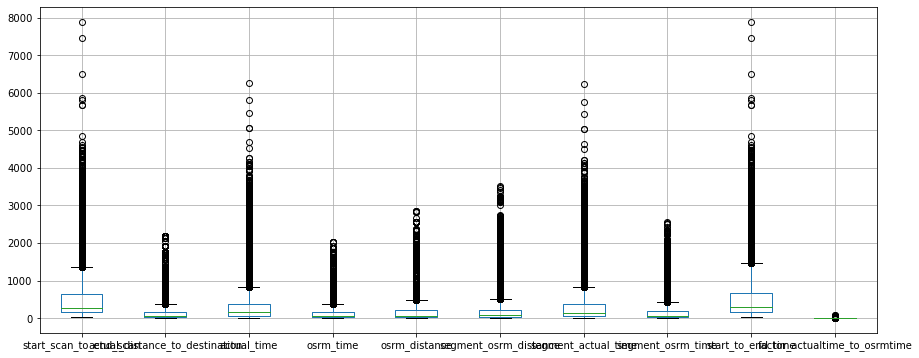

In [42]:
plt.figure(figsize=(15,6))
total_trip.boxplot()

- There can be long distance delhivery so they may take more time so we can't remove those outliers.
- But the factor which is actual_time/osrm_time cannot exceed more as actual_time should be around osrm_time as we want to predict osrm time from the model. This value should be in IQR range comparing with all.

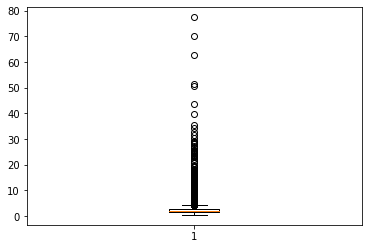

In [43]:
plt.boxplot((total_trip['actual_time']/total_trip['osrm_time']))
plt.show()

In [44]:
(total_trip['actual_time']/total_trip['osrm_time']).describe()

count    14817.000000
mean         2.664211
std          2.363017
min          0.485714
25%          1.750000
50%          2.101227
75%          2.765625
max         77.387097
dtype: float64

In [45]:
q1 =(total_trip['actual_time']/total_trip['osrm_time']).quantile(0.25)
q3 =(total_trip['actual_time']/total_trip['osrm_time']).quantile(0.75)
IQR = (total_trip['actual_time']/total_trip['osrm_time']).quantile(0.75)-(total_trip['actual_time']/total_trip['osrm_time']).quantile(0.25)

total_trip = total_trip[(total_trip['factor_actualtime_to_osrmtime']>q1-IQR) & (total_trip['factor_actualtime_to_osrmtime']<q3+IQR)]

In [46]:
total_trip.columns

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'trip_creation_time', 'route_type', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'start_to_end_time', 'trip_created_month',
       'trip_created_day', 'factor_actualtime_to_osrmtime'],
      dtype='object')

Removing unwanted columns for using in models

In [47]:
total_trip.drop(columns=['source_center','destination_center','trip_uuid','source_name','destination_name', 'trip_creation_time','od_start_time','od_end_time', 'source_city', 'source_state', 'destination_city','destination_state'],inplace=True)

we can also use source_center and destination_center do label encoding depending on the model we want to build.

**Standardization**

In [48]:
total_trip[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance', 'segment_osrm_distance', 'segment_actual_time','segment_osrm_time','start_to_end_time','factor_actualtime_to_osrmtime']]=StandardScaler().fit_transform(total_trip[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance', 'segment_osrm_distance', 'segment_actual_time','segment_osrm_time','start_to_end_time','factor_actualtime_to_osrmtime']])

In [49]:
total_trip.T

,0,1,2,3,4,5,6,7,8,9,...,14805,14806,14807,14808,14809,14810,14811,14812,14814,14815
route_type,Carting,FTL,Carting,FTL,FTL,Carting,Carting,FTL,Carting,FTL,...,Carting,Carting,Carting,Carting,FTL,FTL,FTL,FTL,FTL,Carting
start_scan_to_end_scan,-0.501774,-0.343512,-0.630455,0.734743,-0.404154,-0.315409,-0.090588,0.171211,-0.525439,-0.439652,...,-0.500295,-0.117211,-0.46036,-0.615664,2.802508,3.571633,0.847154,0.495131,0.117964,-0.618622
actual_distance_to_destination,-0.300195,-0.245066,-0.507164,0.596952,-0.2613,-0.459702,0.089831,-0.017659,-0.461365,-0.117824,...,-0.467342,0.094677,-0.214626,-0.502729,1.029516,4.696424,1.168143,0.616918,-0.245522,-0.459683
actual_time,-0.321333,-0.298911,-0.511052,0.773867,-0.352378,-0.49553,0.071904,0.104674,-0.455861,-0.278215,...,-0.519676,-0.014332,-0.304085,-0.567968,2.974613,4.187094,0.853204,0.463416,-0.116091,-0.469659
osrm_time,-0.302361,-0.281327,-0.558275,1.08939,-0.183168,-0.477645,0.118319,0.083262,-0.502184,-0.207708,...,-0.495173,0.079757,-0.179663,-0.526724,1.790523,4.672184,1.029793,0.868532,-0.281327,-0.498679
osrm_distance,-0.295033,-0.238863,-0.522421,0.775163,-0.253191,-0.464615,0.083925,-0.023784,-0.479125,-0.168913,...,-0.479074,0.113301,-0.237769,-0.518398,1.87471,4.722508,1.02434,0.760217,-0.239358,-0.476324
segment_osrm_distance,-0.319798,-0.256681,-0.511021,0.723403,-0.290084,-0.455312,0.03334,-0.106402,-0.472554,-0.196941,...,-0.472509,0.108226,-0.250295,-0.507447,1.924627,4.682757,1.072645,0.80595,-0.259114,-0.470065
segment_actual_time,-0.323494,-0.300854,-0.509842,0.777177,-0.351359,-0.495909,0.066617,0.106673,-0.455853,-0.278213,...,-0.520291,-0.016978,-0.309562,-0.569055,2.997677,4.174977,0.852065,0.460212,-0.112764,-0.471527
segment_osrm_time,-0.328214,-0.273818,-0.545797,0.922888,-0.180136,-0.458159,0.055578,0.022337,-0.503489,-0.249642,...,-0.494423,0.125084,-0.213378,-0.521621,1.744868,4.612733,1.022614,0.937998,-0.258708,-0.500467
start_to_end_time,-0.518877,-0.362532,-0.644538,0.704121,-0.419518,-0.333309,0.062668,0.16495,-0.540795,-0.456047,...,-0.515955,-0.13459,-0.475042,-0.631387,2.746835,3.506643,0.816631,0.467412,0.093353,-0.632848


**One-hot encoding**

In [50]:
total_trip =pd.get_dummies(total_trip, columns = ['route_type', 'trip_created_month','trip_created_day']).T

In [52]:
total_trip

,0,1,2,3,4,5,6,7,8,9,...,14805,14806,14807,14808,14809,14810,14811,14812,14814,14815
start_scan_to_end_scan,-0.501774,-0.343512,-0.630455,0.734743,-0.404154,-0.315409,-0.090588,0.171211,-0.525439,-0.439652,...,-0.500295,-0.117211,-0.460360,-0.615664,2.802508,3.571633,0.847154,0.495131,0.117964,-0.618622
actual_distance_to_destination,-0.300195,-0.245066,-0.507164,0.596952,-0.261300,-0.459702,0.089831,-0.017659,-0.461365,-0.117824,...,-0.467342,0.094677,-0.214626,-0.502729,1.029516,4.696424,1.168143,0.616918,-0.245522,-0.459683
actual_time,-0.321333,-0.298911,-0.511052,0.773867,-0.352378,-0.495530,0.071904,0.104674,-0.455861,-0.278215,...,-0.519676,-0.014332,-0.304085,-0.567968,2.974613,4.187094,0.853204,0.463416,-0.116091,-0.469659
osrm_time,-0.302361,-0.281327,-0.558275,1.089390,-0.183168,-0.477645,0.118319,0.083262,-0.502184,-0.207708,...,-0.495173,0.079757,-0.179663,-0.526724,1.790523,4.672184,1.029793,0.868532,-0.281327,-0.498679
osrm_distance,-0.295033,-0.238863,-0.522421,0.775163,-0.253191,-0.464615,0.083925,-0.023784,-0.479125,-0.168913,...,-0.479074,0.113301,-0.237769,-0.518398,1.874710,4.722508,1.024340,0.760217,-0.239358,-0.476324
segment_osrm_distance,-0.319798,-0.256681,-0.511021,0.723403,-0.290084,-0.455312,0.033340,-0.106402,-0.472554,-0.196941,...,-0.472509,0.108226,-0.250295,-0.507447,1.924627,4.682757,1.072645,0.805950,-0.259114,-0.470065
segment_actual_time,-0.323494,-0.300854,-0.509842,0.777177,-0.351359,-0.495909,0.066617,0.106673,-0.455853,-0.278213,...,-0.520291,-0.016978,-0.309562,-0.569055,2.997677,4.174977,0.852065,0.460212,-0.112764,-0.471527
segment_osrm_time,-0.328214,-0.273818,-0.545797,0.922888,-0.180136,-0.458159,0.055578,0.022337,-0.503489,-0.249642,...,-0.494423,0.125084,-0.213378,-0.521621,1.744868,4.612733,1.022614,0.937998,-0.258708,-0.500467
start_to_end_time,-0.518877,-0.362532,-0.644538,0.704121,-0.419518,-0.333309,0.062668,0.164950,-0.540795,-0.456047,...,-0.515955,-0.134590,-0.475042,-0.631387,2.746835,3.506643,0.816631,0.467412,0.093353,-0.632848
factor_actualtime_to_osrmtime,-0.349887,-0.322309,2.781571,-0.781738,-1.497603,-0.589666,-0.359769,-0.034399,1.292336,-0.739774,...,-0.847659,-0.609502,-1.130246,-1.762725,1.562147,-0.458744,-0.512620,-1.086116,1.576746,0.731455
